<!-- | Notebook Top-to-Bottom Runtime ~ 5 Minutes -->

<!-- {bdg-link-info}Reference [1] <https://link.springer.com/article/10.1007/s00216-015-8681-7> {bdg-link-info}Reference [2] <https://doi.org/10.1016/j.trac.2023.116944> {bdg-link-info}Reference [3] <https://doi.org/10.1016/j.trac.2019.04.008> {bdg-link-info}Reference [4] <https://pubmed.ncbi.nlm.nih.gov/36174727/> {bdg-link-info}DSFP Homepage <https://dsfp.norman-data.eu/> {bdg-link-info}Notebook Repository <https://github.com/NERC-CEH/DSFP-PyExplorer> {bdg-warning-line}Ongoing Development -->

::: callout-tip
## Challenge

While polltants know no boundaries, pollution analysis are often limited to a single compartment. By integrating data across compartments, we can better understand their effects and responses holistically.

However, data from many different sources are difficult to discover and integrate. The purpose of this notebook and the UK Environmental Exposure (UK-EEX) Hub is to make it easier to discover, process, analyse, and visualize the wealth of data regarding environmental pressures and responses, particularly related to chemical substances.
:::

::: callout-tip
## Approach

This notebook demonstrates various ways to integrate data from various compartments from a single substance. Cadmium (Cd), a heavy metal, is used as an example. It shows various methods of combining gridded and point data, and make them ready for statistical and machine learning analysis. All maps in this notebook are generated by the `tmap` R package.
:::

::: {.callout-note collapse="true"}
## Downloading data

The following datasets are used in the is notebook: 
- Otter data: [Biological characteristics, liver metal concentrations, habitat biogeochemistry and habitat contamination sources of UK otters (2006-2017)](https://catalogue.ceh.ac.uk/documents/0fbb2c90-5b54-427a-a083-55c022802a80), also available on Datalabs asset repo 
- [UK NUTS regions](https://geoportal.statistics.gov.uk/datasets/e9cfbf2e478a481bb367eb2f2891d504_0/about) 
- [EU topsoils Cadmium](https://esdac.jrc.ec.europa.eu/content/cadmium-topsoils-european-union) 
- [Environmental Agency Water Quality Archive]('https://environment.data.gov.uk/water-quality/view/landing'): mean Cd data aggregate from the sensor integration tool API mentioned below.

In addition, the following portals are mentioned: 
- [Hydrological sensor data integration tool](https://hydrosensordata.ceh.ac.uk/?dist=10&latitude=52&longitude=-1) 
- [National Air Emissions Inventory (NAEI) maps](https://naei.energysecurity.gov.uk/emissionsapp/)
:::

::: {.callout-caution collapse="true"}
## Computational demands

No heavy computation is included in this notebook.
:::

## Metals Pollution

Heavy metals are natural constituents of the Earth's crust. They are stable and cannot be degraded or destroyed, and therefore they tend to accumulate in soils and sediments. However, human activities have drastically altered the biochemical and geochemical cycles and balance of some heavy metals. The principal man-made sources of heavy metals are industrial point sources, e.g. mines, foundries and smelters, and diffuse sources such as combustion by-products, traffic, etc. Relatively volatile heavy metals and those that become attached to air-borne particles (particulates) can be widely dispersed throughout the atmosphere, often being deposited thousands of miles from the site of initial release. In general, the smaller and lighter a particle is, the longer it will stay in the air. Larger particles (greater than 10 micrometers (µm) in diameter) tend to settle to the ground by gravity in a matter of hours whereas the smallest particles (less than 1µm in diameter ) can stay in the atmosphere for weeks and are mostly removed by precipitation.

## Causal loop diagram

Metals pollution were typically studied in compartments (e.g. air, soil, biota, water). Metals pollution is a complex issue with impacts that span across different environmental compartments and influence ecosystems and human health through the food chain. Systems thinking helps to map these connections and understand that problems like industrial runoff, waste disposal, and agricultural use are not isolated issues but are interconnected parts of a larger system.

By considering the whole system holistically, policymakers and scientists can better identify key leverage points for more effective, integrated strategies that avoid unintended consequences.

To adopt a systems thinking view, a causal loop diagram is often constructed to describe all the potential linkages between environmental pressures and responses. Here is an example:

<!-- ![Causal loop diagram for metals pollution.](img/Picture1.jpg){.lightbox} -->

<!-- https://ncase.me/loopy/v1.1/?embed=1&data=[[[4,741,329,0.5,%22Rain%22,4],[5,1067,153,0.5,%22soil%22,3],[6,505,116,0.5,%22Air%22,4],[7,933,768,0.5,%22Rivers%22,4],[8,1126,751,0.5,%22Lakes%22,4],[9,1339,726,0.5,%22Sea%22,4],[10,1403,191,0,%22terrestrial%22,1],[12,395,768,0,%22Marine%22,1],[13,483,369,0,%22Avian%22,1],[14,17,436,0,%22Freshwater%22,1],[15,1604,319,0,%22Humans%22,1],[16,788,-63,1,%22Mining%22,0],[17,1416,-75,0.5,%22Spills%252Fleaks%22,0],[18,-17,-4,0.83,%22Combustion%22,0],[19,501,-109,0.66,%22Industry%22,0],[20,1190,-114,0.83,%22Waste%2520disposal%22,0],[21,200,9,0.66,%22Transport%22,0]],[[6,5,56,1,0],[4,5,25,1,0],[6,4,18,1,0],[4,7,-13,1,0],[7,8,-3,1,0],[8,9,58,1,0],[5,7,18,1,0],[5,8,18,1,0],[5,9,46,1,0],[5,10,78,1,0],[6,13,-47,1,0],[4,13,36,1,0],[5,13,841,1,0],[9,12,43,1,0],[7,14,21,1,0],[8,14,36,1,0],[12,13,147,1,0],[14,13,33,1,0],[13,15,-507,1,0],[14,15,-184,1,0],[12,15,-25,1,0],[10,15,78,1,0],[16,5,-63,1,0],[17,5,25,1,0],[18,6,-41,1,0],[21,6,14,1,0],[19,6,23,1,0],[19,5,-46,1,0],[16,6,-71,1,0],[20,5,-21,1,0],[20,6,-75,1,0],[18,5,158,1,0],[21,5,242,1,0],[10,13,122,1,0],[18,4,-87,1,0],[21,7,-215,1,0],[17,7,41,1,0],[16,7,34,1,0]],[[-147,733,%22Metal%2520bioaccumulation%22]],21%5D -->

<iframe width="800" height="880" frameborder="0" src="https://ncase.me/loopy/v1.1/?embed=1&amp;data=[[[7,586,176,0.33,%22FIREFOAMS%22,5],[10,761,659,0.83,%22DISTRIBUTION%22,4],[12,676,482,0.5,%22APPLICATION%22,1],[13,757,816,1,%22PFAS%2520PRODUCTION%22,0],[14,861,519,0.66,%22MANUFACTURING%22,2],[15,1009,416,0,%22CLOTHING%22,2],[16,964,650,0.33,%22DOMESTIC%2520PRODUCTS%22,2],[17,1119,549,0.5,%22VEHICLES%22,2],[18,853,338,0,%22INDUSTRY%22,2],[19,461,46,0.33,%22INDUSTRIAL%2520SITES%22,5],[20,805,57,0.33,%22AIRPORTS%22,5],[21,373,213,0.33,%22WILDFIRES%22,5],[22,13,657,0,%22WWTP%22,1],[23,463,452,0,%22SLUDGE%2520TO%2520LAND%22,0],[24,1420,447,0.33,%22PRODUCT%2520USE%22,0],[25,1342,107,0.66,%22RUN%2520OFF%22,0],[26,265,366,0,%22PESTICIDES%22,0],[27,378,792,0.5,%22TO%2520WASTE%2520WATER%22,0],[28,100,483,0,%22TO%2520SOIL%22,0],[29,183,234,0,%22TO%2520GROUND%2520WATER%22,0],[30,253,75,0,%22TO%2520AIR%22,0],[31,1310,817,0.5,%22TO%2520LANDFILL%22,0],[33,49,305,0.33,%22soil%2520fauna%22,3],[34,-13,12,0.33,%22birds%22,3],[35,8,105,0.33,%22terrestrial%2520wildlife%22,3],[36,185,731,0.33,%22aquatic%2520wildlife%22,3],[37,870,172,0.33,%22terrestrial%2520animals%22,3],[38,313,636,0.33,%22vegetation%22,3],[39,1009,100,0.33,%22man%22,3],[40,62,856,0.33,%22freshwaters%22,3],[41,255,854,0.33,%22marine%22,3]],[[13,10,-31,1,0],[10,14,31,1,0],[10,12,-46,1,0],[14,18,20,1,0],[14,15,-15,1,0],[14,16,10,1,0],[14,17,9,1,0],[7,19,16,1,0],[7,21,-37,1,0],[7,20,-23,1,0],[12,7,24,1,0],[12,26,-37,1,0],[12,23,-46,1,0],[22,23,-36,1,0],[18,25,-24,1,0],[16,24,6,1,0],[17,25,19,1,0],[24,25,76,1,0],[14,25,-31,1,0],[18,25,42,1,0],[15,25,-41,1,0],[25,27,298,1,0],[18,27,-131,1,0],[27,22,161,1,0],[23,27,-43,1,0],[16,27,37,1,0],[17,27,210,1,0],[14,27,-33,1,0],[24,27,68,1,0],[12,27,65,1,0],[21,30,-34,1,0],[19,30,-29,1,0],[20,30,-88,1,0],[26,29,41,1,0],[26,28,-39,1,0],[23,28,-15,1,0],[23,29,-50,1,0],[21,28,137,1,0],[20,28,59,1,0],[19,28,148,1,0],[15,30,-69,1,0],[17,30,-74,1,0],[16,31,-48,1,0],[17,31,32,1,0],[15,31,186,1,0],[18,31,227,1,0],[31,29,126,1,0],[31,27,120,-1,0],[28,33,12,-1,0],[33,35,14,-1,0],[33,34,-9,-1,0],[33,35,-29,-1,0],[34,35,23,-1,0],[35,34,6,-1,0],[36,34,58,-1,0],[38,35,14,-1,0],[38,34,65,-1,0],[38,37,-64,-1,0],[38,39,142,-1,0],[37,39,-29,-1,0],[30,39,102,-1,0],[30,37,21,-1,0],[30,34,-22,-1,0],[30,35,24,-1,0],[22,40,55,-1,0],[40,41,10,-1,0],[40,36,20,-1,0],[41,36,-6,-1,0]],[],41%5D">

</iframe>

## The difficulty to study across compartments

Using cadmium (Cd) as an example chemical, if one would like to visualize Cd pollution across air, land, water, and biota, they will need to go to different portals for each dataset, or downloading the individual datasets.

-   Air

-   Soil

-   Predatory Birds

-   River water

Here are some example screenshots of web portals:

![NAEI portal.](img/NAEI_Cd.png){.lightbox}

![Soil and PBMS data for metals pollution.](img/Screenshot_2025-08-13_150808.png){.lightbox}

<!-- ![Casual loop diagram for metals pollution.](img/Picture1.jpg){.lightbox} -->

![River flow data from portal](img/Screenshot_2025-08-13_60337.png){.lightbox}



The following code shows how to plot air and soil pollution maps, individually.


In [16]:

library(tmap)
library(terra)
library(viridis)
library(readr)
library(tidyr)
library(dplyr)
library(sf)
library(cols4all)  # for flipping colour bar in tmap

dataset_path <- 'temp/datasets'

ℹ tmap modes "plot" - "view"


Warning messages:
1: Values have found that are less than the lowest break. They are assigned to the lowest interval 
2: Values have found that are higher than the highest break. They are assigned to the highest interval 


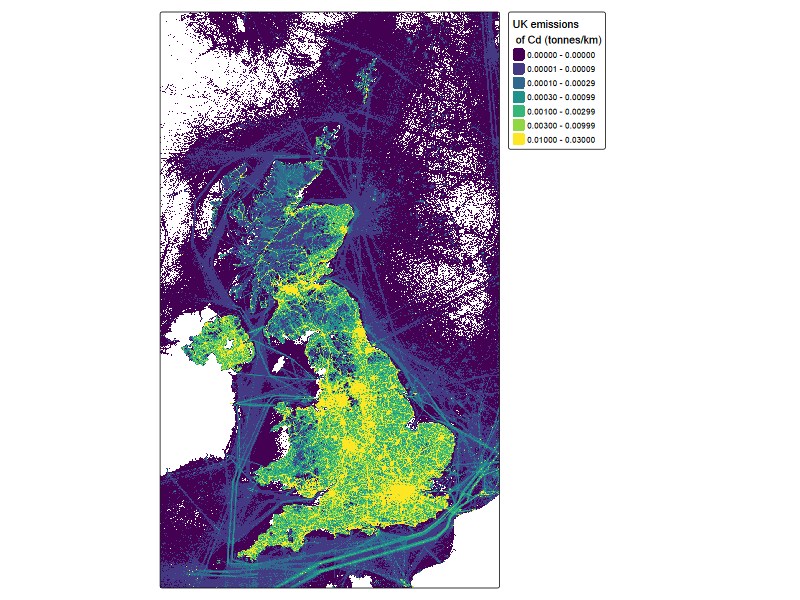

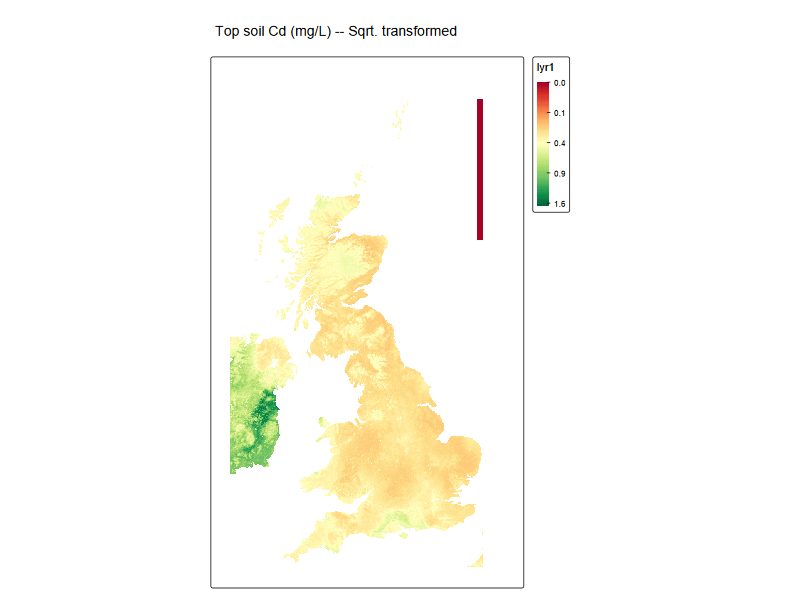

In [17]:
tmap_mode("plot")
# tm_shape(cd_NAEI_raster ) +
#   tm_raster(
#     col.scale = tm_scale_continuous_log10(
#       ticks = c(5e-5,5e-4, 5e-3,5e-2) # Define log increments for the legend
#     )
#   )

cd_NAEI_raster <-rast(file.path(dataset_path,'NAEI_maps/naei_cd_2023/GeoTIFF_layers/totalcd23_2023.tif'))
cd_EUSO_raster <-rast(file.path('data/topsoil_Cd_UK_small.tif'))

NAEI_tmap <- 
  tm_shape(cd_NAEI_raster ) +
  tm_raster(
    col.scale = tm_scale_intervals(
        
      style = 'fixed',
      breaks = c(1e-6,1e-5,1e-4,3e-4,1e-3,3e-3,1e-2, 3e-2),
      values = "viridis"
      #labels =  c("low", "medium", "high")
      
    ),
    col.legend = tm_legend(title = "UK emissions\n of Cd (tonnes/km)",
                           labels.fomat = 'scientific'),
    
  )

EUSO_tmap <- 
  tmap::tm_shape(cd_EUSO_raster) +
      tmap::tm_raster(
          col.scale = tmap::tm_scale_continuous_sqrt(
              values = "brewer.rd_yl_gn",
              midpoint = NA),
          # col.legend = tm_legend(title = "Modelled Cd in soil",
          #                  labels.fomat = 'scientific')
    
  ) + 
  tm_title("Top soil Cd (mg/L) -- Sqrt. transformed")

NAEI_tmap

EUSO_tmap




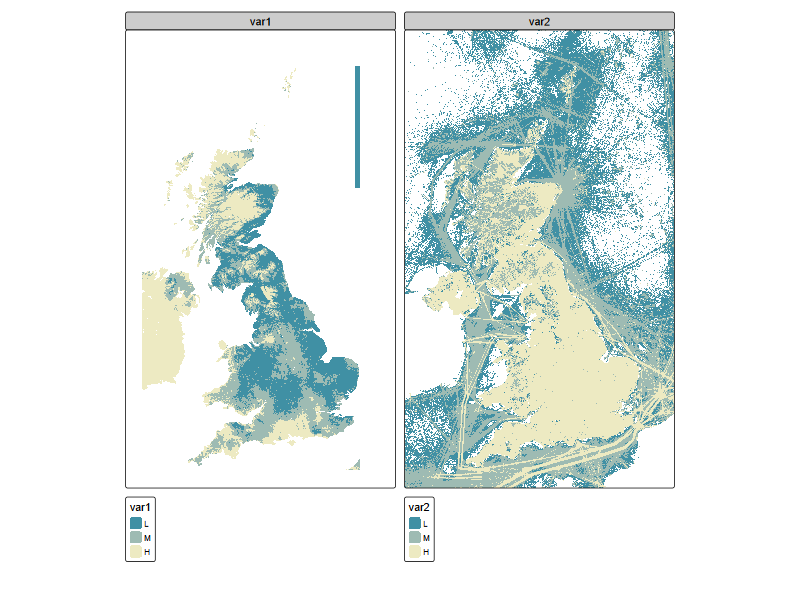

In [18]:


#bivariate map
# raster1_projected <- project(cd_EUSO_raster, cd_NAEI_raster , method = "bilinear") # no need if scale matches
raster1_projected <- cd_EUSO_raster

r_stack <- c(raster1_projected , cd_NAEI_raster )
names(r_stack) <- c("var1", "var2")

r_stack$var1[r_stack$var1 == 0] <- 1e-3  # abitrary, just for quantiles

r_stack$var1 = log10(r_stack$var1) # soil


r_stack$var2[r_stack$var2 < 1e-6] <- NA # remove off shore

r_stack$var2 = log10(r_stack$var2) #NAEI



tm_shape(r_stack) + 
    tm_raster(
        col = tm_vars(c("var1", "var2"), multivariate = FALSE),
        col.scale = tm_scale_intervals(style = "quantile", n = 3, labels = c("L", "M", "H"),
        values = "-carto.earth"))





But how are air and soil pollution hotspots co-located? Here we can use an integration tool called *bivariate plots*. Essentially, this is to colour the pixels on the map with a two-dimensional colour map.


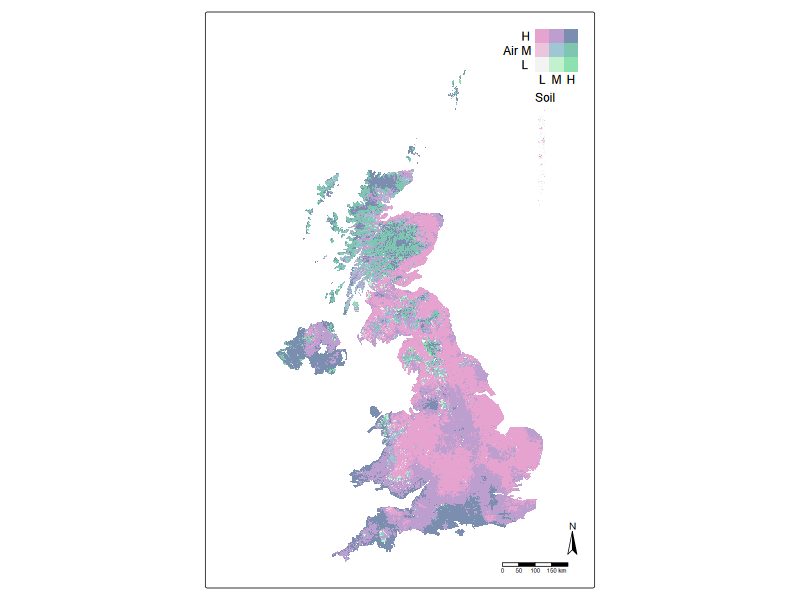

In [19]:
stevens.bluered <- matrix(c("#E8E8E8", "#E4ACAC", "#C85A5A",
                 "#B0D5DF", "#AD9EA5", "#985356",
                 "#64ACBE", "#627F8C", "#574249"),
                 byrow = TRUE, ncol = 3)

tm_shape(r_stack) + 
    tm_raster(
        col = tm_vars(c("var2", "var1"), multivariate = TRUE),
        col.scale = tm_scale_bivariate(
        scale1 = tm_scale_intervals(style = "quantile", n = 3, labels = c("L", "M", "H")),
        scale2 = tm_scale_intervals(style = "quantile", n = 3, labels = c("L", "M", "H")),
        values =  "stevens.pinkgreen"), # 97.94% colour-blind friendly
        col.legend = tm_legend_bivariate(
            position = c("top", "right"),
            xlab = "Soil",
            ylab = "Air",
            xlab.size = 1,
            ylab.size = 1,
            item.r = 0,
            item.width = 1,
            item.height = 1,
            text.size = 1,
            ))+
    #tm_credits("UKCEH") +
    tm_compass(type = "arrow") +
    tm_scalebar()+
    tm_components(frame = FALSE)+
    tm_layout(inner.margins = c(0, 0.15, 0.02, 0.02))



## Predatory birds and otters data


Rows: 278 Columns: 57
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (6): Sex, AgeClass, Al, Sb, V, Mine
dbl (51): UWCRef, Year, Batch, Weight, Length, sSMI, X, Y, DM, Mn, Fe, Co, N...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


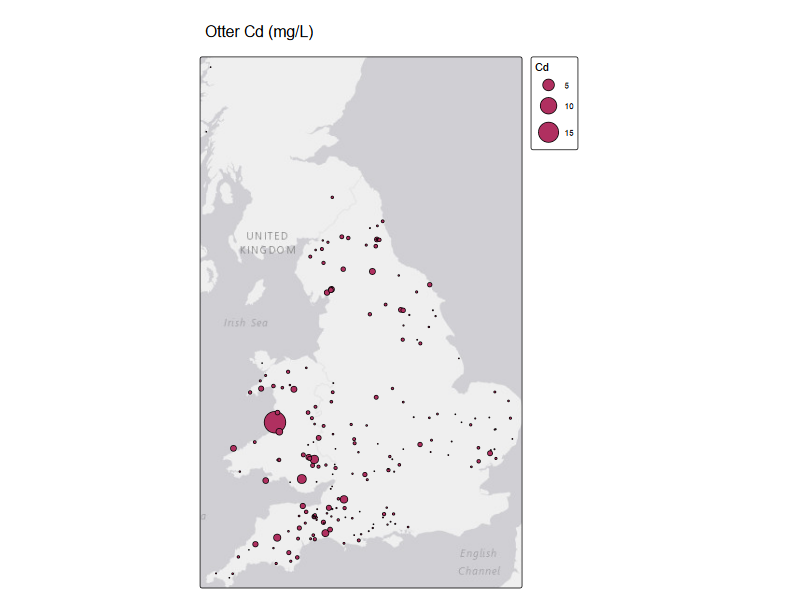

In [20]:

# otter_metals <- read_csv('/assets/bio-xter-liver-metal-habitat-uk-otters-2006-2017-v1/data/Concentrations_of_inorganic_elements_in_UK_otter_livers_2006–2017.csv')
otter_metals <- read_csv('data/Concentrations_of_inorganic_elements_in_UK_otter_livers_2006–2017.csv')
otter_metals[,c('long','lat')] <-sf_project(from = st_crs(27700), to = st_crs(4326),  otter_metals[,c('X','Y')])


tm_shape(st_as_sf(otter_metals, coords = c("long", "lat"), crs = 4326) )+
    tm_basemap() +
  tm_symbols(
    size = "Cd",
    fill = "maroon",
    col = "black",
    lwd = 1,
    size.scale = tm_scale(values.scale = 2)
  )+ 
  tm_title("Otter Cd (mg/L)")




## River water quality data


New names:
• `` -> `...1`
Rows: 404 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (10): site_id, site_name, region, G_ID, S_ID, wb_id, organisation, mater...
dbl (12): ...1, easting, northing, min_year, max_year, HA_NUM, rbd_id, mncat...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


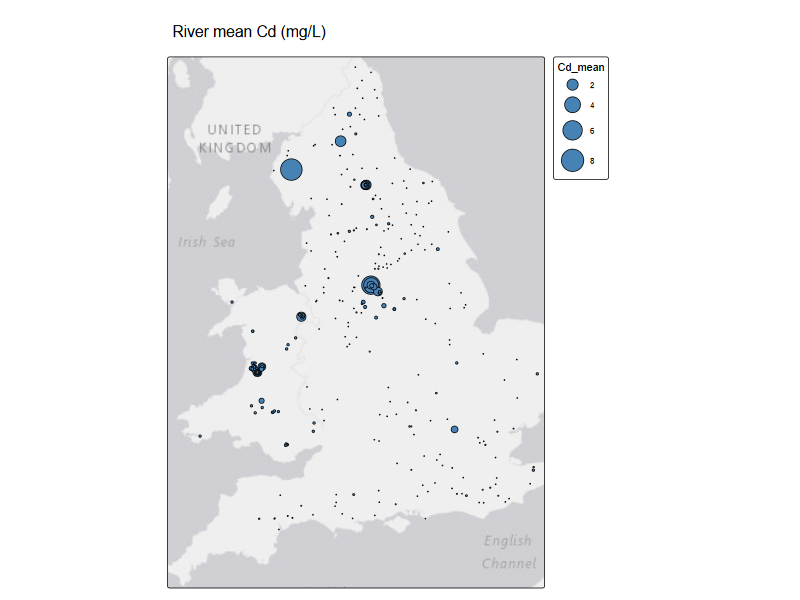

In [21]:

riv_metals <- read_csv('data/Cd_mean_2025.csv')

tm_shape(st_as_sf(riv_metals, coords = c("lon", "lat"), crs = 4326) )+
    tm_basemap() +
  tm_symbols(
    size = "Cd_mean",
    fill = "steelblue",
    # fill.legend = tm_legend(
    #   title = "Mean Cd (mg/L)",
    #   show = TRUE
    # ),
    col = "black",
    lwd = 1,
    size.scale = tm_scale(values.scale = 2) 
  ) + 
  tm_title("River mean Cd (mg/L)"
    ) 



## The power of integration

### (1) Displaying the data together


In [22]:

# tmap_mode("view")
# tm_basemap(c(StreetMap = "OpenStreetMap", TopoMap = "OpenTopoMap")) +
# NAEI_tmap


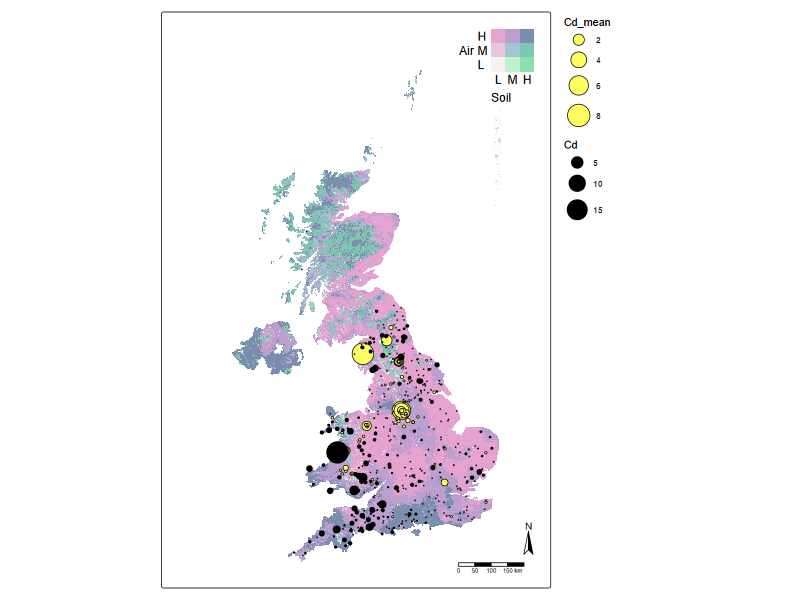

In [23]:

#| fig-cap: "Bivariate chloropleth plot for air and soil cadmium levels, overlaid by otter and river water cadmium levels"

# tmap_mode("view")

tm_shape(r_stack) + 
    tm_raster(
        col = tm_vars(c("var2", "var1"), multivariate = TRUE),
        col.scale = tm_scale_bivariate(
        scale1 = tm_scale_intervals(style = "quantile", n = 3, labels = c("L", "M", "H")),
        scale2 = tm_scale_intervals(style = "quantile", n = 3, labels = c("L", "M", "H")),
        values =  "stevens.pinkgreen"), # 97.94% colour-blind friendly
        col.legend = tm_legend_bivariate(
            position = c("top", "right"),
            xlab = "Soil",
            ylab = "Air",
            xlab.size = 1,
            ylab.size = 1,
            item.r = 0,
            item.width = 1,
            item.height = 1,
            text.size = 1,
            ))+
tm_shape(st_as_sf(riv_metals, coords = c("lon", "lat"), crs = 4326) )+
  tm_symbols(
    size = "Cd_mean",
    col = "black",
    fill = "#FEFE62",
  #  shape = 1,
    lwd = 1,
    size.scale = tm_scale(values.scale = 2) 
  ) +
  tm_shape(st_as_sf(otter_metals, coords = c("long", "lat"), crs = 4326) )+
  tm_symbols(
    size = "Cd",
    fill = "black", #"#CC79A7",
    col = "black",
    lwd = 1,
    size.scale = tm_scale(values.scale = 2)
  )+
    #tm_credits("UKCEH") +
    tm_compass(type = "arrow") +
    tm_scalebar()+
    tm_components(frame = FALSE)+
    tm_layout(inner.margins = c(0, 0.15, 0.02, 0.02))



### (2) Getting data ready for statistical or machine learning analysis

-   Point process modelling[^1]

[^1]: See more at https://www.paulamoraga.com/book-spatial/point-process-modeling.html

<!-- Locations of Solanum plant species in Bolivia from January 2015 to December 2022 obtained from GBIF. ![Point process model points.](https://www.paulamoraga.com/book-spatial/book-spatial_files/figure-html/pplgcpobservedpredictionlocations-cap-1.png){.lightbox} Maps with the posterior mean of the intensity of the point process of species in Bolivia (left), and lower (center) and upper (right) limits of 95% credible intervals. ![Point process model prediction.](https://www.paulamoraga.com/book-spatial/book-spatial_files/figure-html/pplgcpmapintensity-1.png){.lightbox} -->



── tmap v3 code detected ───────────────────────────────────────────────────────
[v3->v4] `tm_polygons()`: use `fill_alpha` instead of `alpha`.


Warning message:
attribute variables are assumed to be spatially constant throughout all geometries 



── tmap v3 code detected ───────────────────────────────────────────────────────
[v3->v4] `tm_tm_raster()`: migrate the argument(s) related to the scale of the
visual variable `col` namely 'palette' (rename to 'values') to col.scale =
tm_scale(<HERE>).
[v3->v4] `tm_raster()`: use `col_alpha` instead of `alpha`.


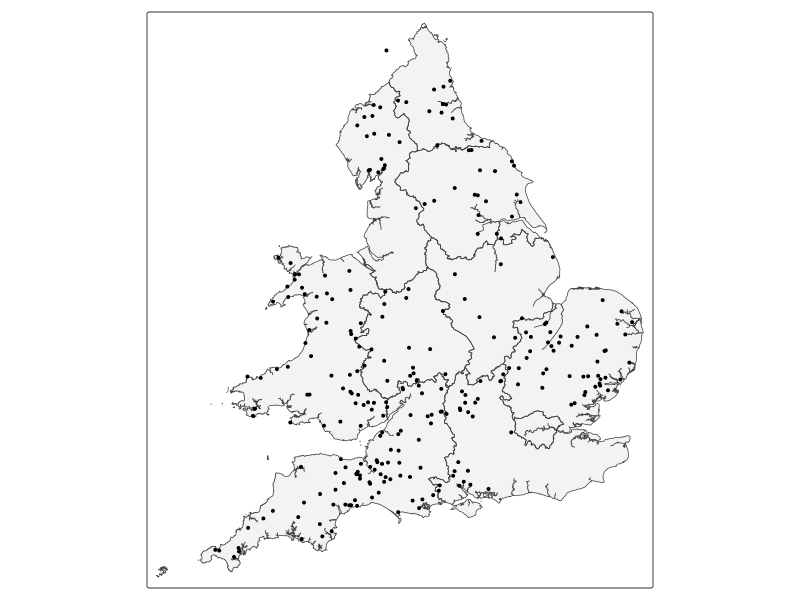

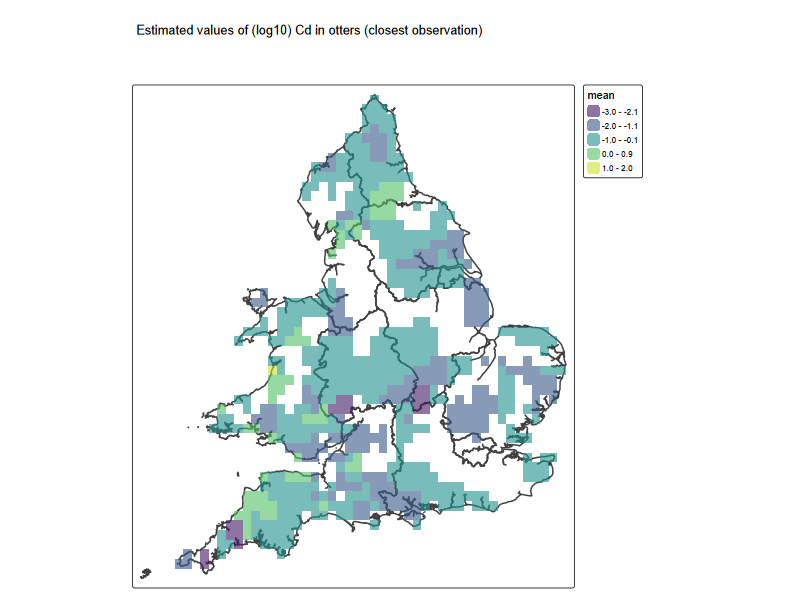

In [24]:

library(maps)
uk_nuts1 <- terra::vect('data/NUTS_Level_1_January_2018_FCB_in_the_United_Kingdom.shp')
eng_wales <- uk_nuts1[1:10,]
# eng_wales <- terra::aggregate(uk_nuts1[1:10,])



metals_map <- st_as_sf(x = otter_metals, coords = c("X", "Y"), crs = st_crs(eng_wales))

# qtm(metals_map)



# Prediction
grid <- terra::rast(eng_wales , nrows = 50, ncols = 50)
xy <- terra::xyFromCell(grid, 1:ncell(grid))

Pred_loc <- st_as_sf(as.data.frame(xy), coords = c("x", "y"),
                 crs = st_crs(eng_wales))
Pred_loc <- st_filter(Pred_loc, st_as_sf(eng_wales)) # filter out points outside domain

# qtm(Pred_loc)


### method (1) closest obs
# Voronoi
v <-terra::voronoi(x = terra::vect(metals_map[1:250,'Cd']), bnd = eng_wales) # some bug: can't deal with last few lines
# plot(v)
# points(vect(metals_map), cex = 0.5)

# # voronoi map
tm_shape(st_as_sf(eng_wales)) + tm_polygons(alpha = 0.3) + tm_shape(metals_map) +
  tm_dots("Cd", palette = "viridis")

# tm_shape(v) +
#   tm_fill(col = "Cd", palette = "viridis", alpha = 0.6) + ### need changing>> what is the 'vble' column
#  tm_shape(metals_map) +
#   tm_dots("Cd", palette = "viridis")+
#   tm_shape(eng_wales) +
#    tm_borders(lwd = 2)

# raster map

resp <- st_intersection(st_as_sf(v), Pred_loc)
resp$pred <- log10(resp$Cd)
pred <- terra::rasterize(resp, grid, field = "pred", fun = "mean")
Cd_grid <- tm_shape(eng_wales) +
   tm_borders(lwd = 2) +
   tm_shape(pred) + tm_raster(alpha = 0.6, palette = "viridis")+
   tm_title('Estimated values of (log10) Cd in otters (closest observation)
            ')

Cd_grid


In [25]:

#| fig-cap: Repeat for water quality

### method (1) closest obs
# Voronoi
# v <-terra::voronoi(x = terra::vect(st_as_sf( riv_metals[c('lon','lat', 'Cd_mean')], 
#                   coords = c("lon", "lat"), crs = 4326) ), bnd = eng_wales) 
v <-terra::voronoi(x = terra::vect(st_as_sf( riv_metals[c('easting','northing', 'Cd_mean')], 
                  coords = c("easting", "northing"), crs = 27700) ), bnd = eng_wales) 

resp <- st_intersection(st_as_sf(v), Pred_loc)
resp$pred <- log10(resp$Cd)
pred_riv <- terra::rasterize(resp, grid, field = "pred", fun = "mean")



Warning message:
attribute variables are assumed to be spatially constant throughout all geometries 



── tmap v3 code detected ───────────────────────────────────────────────────────
[v3->v4] `tm_tm_fill()`: migrate the argument(s) related to the scale of the
visual variable `fill` namely 'palette' (rename to 'values') to fill.scale =
tm_scale(<HERE>).
[v3->v4] `tm_fill()`: use `fill_alpha` instead of `alpha`.
[v3->v4] `tm_fill()`: use `fill_alpha` instead of `alpha`.
[v3->v4] `tm_fill()`: use `fill_alpha` instead of `alpha`.
[v3->v4] `tm_fill()`: use `fill_alpha` instead of `alpha`.


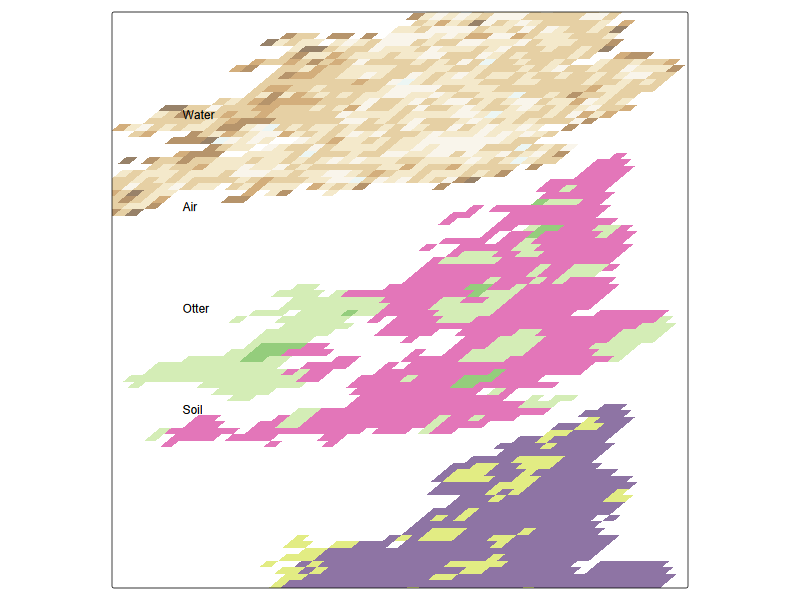

In [26]:

#| fig-cap: Data cube for cadmium data across compartments
#| eval: true
#| fig-height: 6
#| fig-width: 3


# tmap_grob(Cd_grid + tm_layout(legend.show=FALSE, frame = FALSE))
sm <- matrix(c(2.0, 1.2, 0, 1), 2, 2)


pred_sf <- st_as_sf(as.polygons(pred))
pred_sf_tilt <- pred_sf
pred_sf_tilt$geometry <- pred_sf$geometry * sm
st_crs(pred_sf_tilt) <- st_crs(pred_sf)

pred_sf_tilt2 <- pred_sf
pred_sf_tilt2$geometry <- pred_sf_tilt$geometry + c(0,-0 )
st_crs(pred_sf_tilt2) <- st_crs(pred_sf)

## River
pred_riv_sf <- st_as_sf(as.polygons(pred_riv))
pred_sf_tilt3 <- pred_riv_sf 
pred_sf_tilt3$geometry <- pred_riv_sf$geometry * sm + c(0,-1e6 )
st_crs(pred_sf_tilt3) <- st_crs(pred_riv_sf)

# coarse, if not too slow
r_coarse <- resample(r_stack, pred, method="near")
# crop r_stack to England and Wales

r_coarse <- crop(r_coarse, eng_wales, mask=TRUE)


r_coarse_sf <- st_as_sf(as.polygons(r_coarse))
r_coarse_sf2 <- st_as_sf(as.polygons(r_coarse$var2))

r_coarse_sf_tilt <- r_coarse_sf
r_coarse_sf_tilt$geometry <- r_coarse_sf$geometry * sm  + c(0,-1.5e6 )
st_crs(r_coarse_sf_tilt) <- st_crs(r_coarse_sf)


r_coarse_sf2_tilt <- r_coarse_sf2
r_coarse_sf2_tilt$geometry <- r_coarse_sf2$geometry * sm  + c(0,-0.5e6 )
st_crs(r_coarse_sf2_tilt) <- st_crs(r_coarse_sf2)




tm_shape(pred_sf_tilt3 ) + ## everything relative to this
  tm_fill(c('mean'),alpha = 0.6, palette = "brewer.pi_yg") + 
tm_shape(pred_sf_tilt2) + 
  tm_fill(c('mean'),alpha = 0.6, palette = "brewer.prgn") + 
tm_shape(r_coarse_sf_tilt) +
  tm_fill(c('var1'),alpha = 0.6, palette = "viridis") + 
tm_shape(r_coarse_sf2_tilt) +
  tm_fill(c('var2'),alpha = 0.6, palette = "brewer.br_bg") +
  tm_credits('Water', position = c(0.02, 0.92) , size = 1) +
  tm_credits('Air', position = c(0.02, 0.72) , size = 1) +
  tm_credits('Otter', position = c(0.02, 0.5) , size = 1) +
  tm_credits('Soil', position = c(0.02, 0.28) , size = 1) +
  tm_layout(legend.show=FALSE, frame = TRUE, asp = 0)





<!-- Notes: to convert to Jupyter notebook: run `quarto convert metals_EEX_demo.qmd` -->